In [2]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram
# Read an audio file
audio_data, sample_rate = sf.read("../soundfiles/Beethoven_ String Quartet #16 In F, Op. 135 - 1. Allegretto.mp3")

# Write to a WAV file
sf.write("../soundfiles/spectrogram_file.wav", audio_data, sample_rate)

print("Audio conversion successful!")


Audio conversion successful!


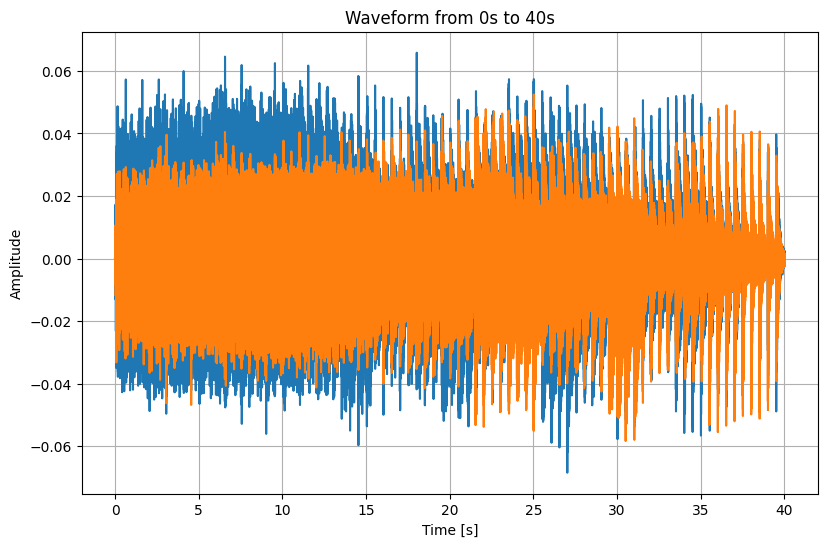

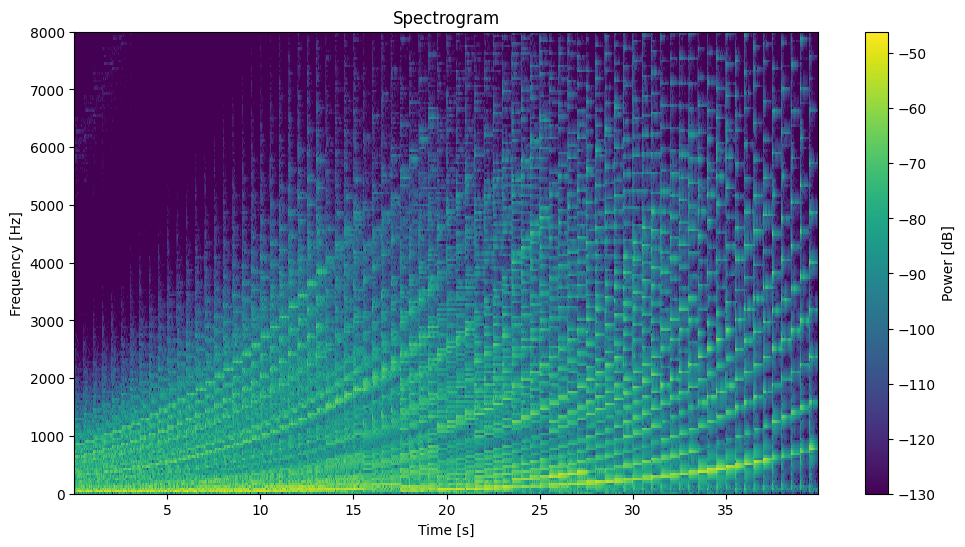

In [10]:
# Load the audio file
audio_data, sample_rate = sf.read("../soundfiles/melody.wav")

# Create a time axis in seconds
duration = len(audio_data) / sample_rate  # total duration of the audio
time = np.linspace(0., duration, len(audio_data))

# Define the range you want to zoom into (e.g., from 2 to 5 seconds)
start_time = 0  # seconds
end_time = 40    # seconds

# Find the indices that correspond to these times
start_index = int(start_time * sample_rate)
end_index = int(end_time * sample_rate)

# Slice the audio data and time arrays
zoomed_audio = audio_data[start_index:end_index]
zoomed_time = time[start_index:end_index]

# Plot the zoomed-in waveform
plt.figure(figsize=(9.5, 6))
plt.plot(zoomed_time, zoomed_audio)
plt.title(f"Waveform from {start_time}s to {end_time}s")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


# Generate the spectrogram
f, t, Sxx = spectrogram(zoomed_audio[:,0], fs=sample_rate, nperseg=1024)

# Avoid taking log of zero by replacing zero values in Sxx with a small value
Sxx = np.where(Sxx <= 1e-13, 1e-13, Sxx)  # Replace zeros with a small value

# Plot the spectrogram (convert to dB scale)
plt.figure(figsize=(12, 6))
plt.pcolormesh(t+start_time, f, 10 * np.log10(Sxx))  # Convert power to dB
plt.title("Spectrogram")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(label="Power [dB]")
plt.ylim(0, 8000)  # Optional: limit frequency range to 10 kHz
plt.show()